## Part 2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Title feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

## Import Libraries

In [60]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

## Load Cleaned data here!

In [61]:
data = pd.read_csv('../data/clean/titanic_cleaned.csv')

<br>

## AgeBand

#### Problem With Age Feature:
As mentioned earlier that **Age is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.

**Eg:**If I say to group or arrange passanger by **Gender**, We can easily segregate them by Male and Female.

Now if I say to group them by their **Age**, then how would you do it? If there are 30 passangers, there may be 30 *unique* age values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalization. We will be using binning i.e group a range of ages into a single bin or assign them a single value.

#### We'll use the `pd.qcut()` function to label and bin each `Age` as `0, 1, 2, 3, or 4`

**`pd.qcut()`** splits the values according to the number of bins we have passed aka the `q` parameter. So if we pass in `q=5`, `pd.qcut()` will arrange the values, equally-spaced, into 5 seperate bins or value ranges.

In [62]:
data['AgeBand'] = pd.qcut(x=data['Age'], q=5, labels=[0,1,2,3,4])

#### Check the number of passenegers in each band

In [63]:
data['AgeBand'].value_counts().sort_index().to_frame().style.background_gradient(cmap='summer_r')

,AgeBand
0,183
1,176
2,264
3,91
4,177


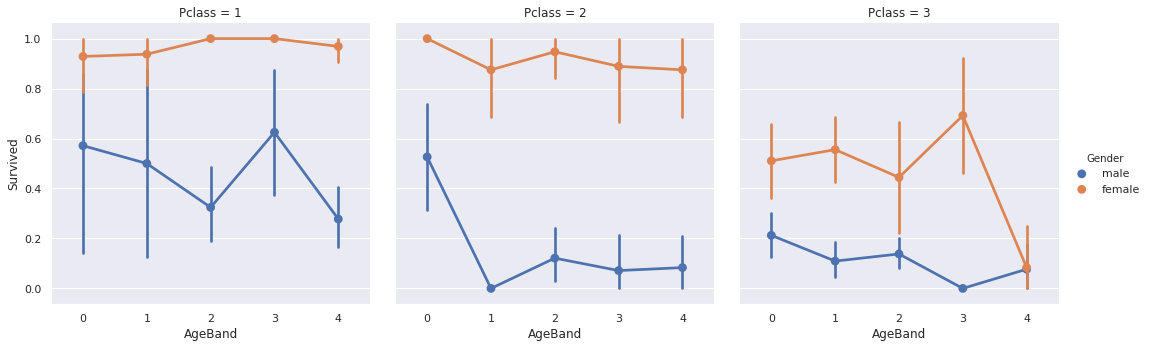

In [64]:
sns.catplot('AgeBand', 'Survived', kind= "point", hue= "Gender", data= data, col= 'Pclass')
plt.show()

### Observations?

What do you notice in the plots above?

<br>

## FamilySize and Alone
At this point, we can create the feature `FamilySize` and analyse it. This feature is the summation of ParCh and SibSp. It combines those two so that we can run a more comprhensive comparison for the question of survival rate when compared to the family size of a passenger.

we can also create a features `Alone` and analyse it as well. Alone will denote whether a passenger traveled alone or not.

#### FamilySize should be calculated by `ParCh` + `SibSp` + Passanger

In [65]:
data['FamilySize'] = 0

In [66]:
data['FamilySize'] = data['ParCh'] + data['SibSp'] + 1

<br>

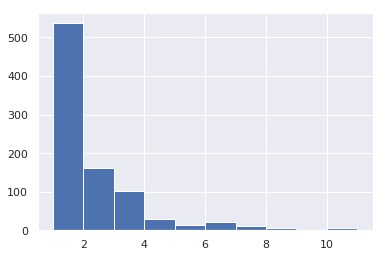

In [67]:
data['FamilySize'].hist()
plt.show()

### <span style="color:red"> Exercise 1 </span> - Create the Alone column

##### 1. Create a column composed entirely of `0`s

In [68]:
data['Alone'] = 0

##### 2. use data.loc to set `Alone` = `1` for any row where `FamilySize` is `1`.

In [69]:
data.loc[data["FamilySize"] == 1, "Alone"] = 1
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,1


<br>

#### Let's Plot these 2 new columns against `Survived`

/home/matthew/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/matthew/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


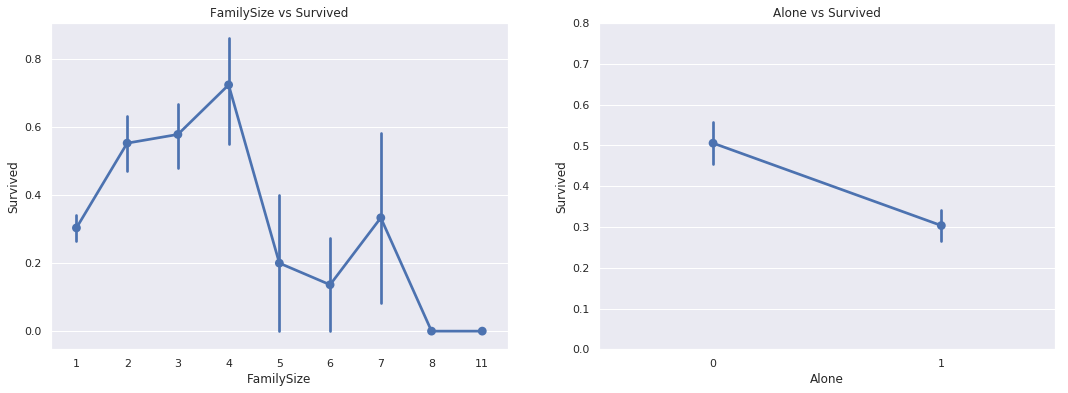

In [70]:
f, ax = plt.subplots(1,2, figsize=(18,6))

sns.factorplot('FamilySize', 'Survived', data= data,ax= ax[0])
ax[0].set_title('FamilySize vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
ax[1].set_ylim(0,0.8)
plt.close(2)
plt.close(3)
plt.show()

### Observations?

What do you notice in the plot above?

<br>

/home/matthew/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


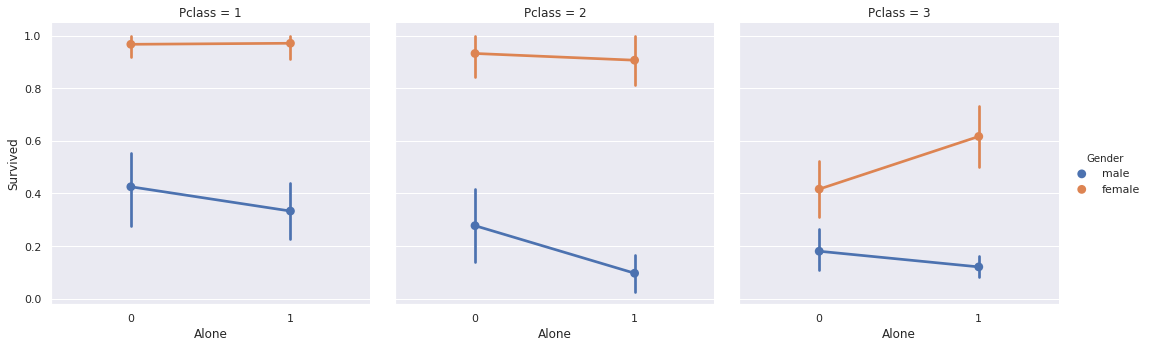

In [71]:
sns.factorplot('Alone','Survived',data=data,hue='Gender',col='Pclass')
plt.show()

### Observations?

What do you notice in the plot above?

<br>

## FareCat

### <span style="color:red"> Exercise 2</span>  - Use `pd.qcut()` to make FareCat

#### 1. Use `pd.qcut()` function to label and bin each `Fare` as `0, 1, 2, or 3`

**Reminder!**

**`pd.qcut()`** splits the values according to the number of bins we have passed aka the `q` parameter. So if we pass in `q=5`, `pd.qcut()` will arrange the values, equally-spaced, into 5 seperate bins or value ranges.

In [72]:
data["FareCat"] = pd.qcut(x=data["Fare"], q = 4, labels=[0,1,2,3])# qcut

In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamilySize,Alone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,1,1


#### 2. What is the average survival rate for each Fare Category?

In [74]:
data.groupby('FareCat').mean()['Survived']

FareCat
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64

### Observations?

What do you notice in the plot above?

<br>

In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamilySize,Alone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,1,1


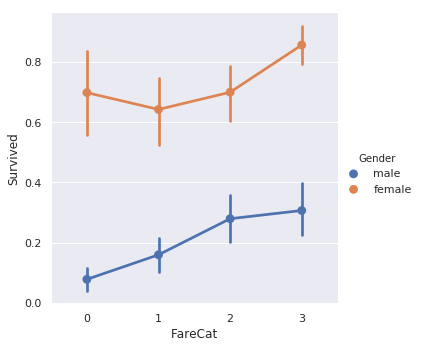

In [76]:
sns.catplot('FareCat', 'Survived', kind= 'point', data= data, hue= 'Gender')
plt.show()

### Observations?

What do you notice in the plot above?

<br>

## Encode Categorical Data

Since we cannot pass strings to a machine learning model, we need to convert features like Gender, Embarked, etc into numeric values.

In [77]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<br>

### <span style="color:red"> Exercise 3</span> - Encode / One-Hot-Encode

#### 1. Use `.repalce()` to to `encode` all `binary` categorical features into `1`s and `0`s

**Binary:** The feature has **EXACTLY** 2 unique categories. 

In [78]:
data["Gender"] = data["Gender"].replace({"male": 0,
                                         "female":1})
#data["Gender"] = data["Gender"].replace( ["male", "female"], [0,1])

In [79]:
data["Gender"].value_counts()

0    577
1    314
Name: Gender, dtype: int64

#### 2. Use `pd.get_dummies()` to `one-hot-encode` all `non-binary` categorical features

**Non-Binary:** the feature has > 2 unique categories 

**Note:** Eventhough the categories of `Pclass`,`FamilySize`, and `FareCat` are "numerical", they still count as categorical data! 

This is due to the fact that the numbers stand for some sort of category/bin and don't hold an actual arithmetic value. 

In [83]:
data = pd.get_dummies(data=data,columns=["Pclass", "FamilySize", "FareCat", "Title", "AgeBand", 'Embarked']) # don't dummy 'SibSp' or 'ParChild' b/c they are incorperated in familySize
# don't seperate binary valued columns i.e. 'Alone', 'Gender'

<br>

## Dropping UnNeeded Features

**SibSP**--> We don't this feature as we have FamilySize now

**ParCh**--> ditto


In [84]:
data = data.drop(['SibSp','ParCh'], axis=1)

<br>

### <span style="color:red"> Exercise 4</span> - Drop All Unwanted Columns

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**PassengerId**--> Cannot be categorised.

In [86]:
data = data.drop(['Name','Age', "Ticket", "Fare", "Cabin", "PassengerId"], axis=1)# drop all cols above

<br>

## Ignore Below

In [ ]:
# train = data[data.index < 891]
# test = data[data.index >= 891]

In [ ]:
# test = test.drop("Survived", axis=1).reset_index(drop=True)

<br>

## Save your Analytical Base Table!

In [87]:
data.head()

,Survived,Gender,Alone,Pclass_1,Pclass_2,Pclass_3,FamilySize_1,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11,FareCat_0,FareCat_1,FareCat_2,FareCat_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBand_0,AgeBand_1,AgeBand_2,AgeBand_3,AgeBand_4,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [88]:
data.to_csv("../data/clean/titanic_abt.csv", index=None)